In [8]:
import nbimporter
import import_ipynb


import os
import sys

def add_path_to_sys(path):
    module_path = os.path.abspath(path)
    if module_path not in sys.path:
        sys.path.append(module_path)

usePath = os.path.join(r'c:', os.sep,'Users','scrwh','Documents','PythonScripts')
add_path_to_sys(usePath)


import ModelsListDiffFuntions
from ModelsListDiffFuntions import *

# List all the functions defined in the other notebook
print(dir(ModelsListDiffFuntions))

['AbstractRNNCell', 'Activation', 'ActivityRegularization', 'Adam', 'Add', 'AdditiveAttention', 'AlphaDropout', 'Attention', 'Average', 'AveragePooling1D', 'AveragePooling2D', 'AveragePooling3D', 'AvgPool1D', 'AvgPool2D', 'AvgPool3D', 'BatchNormalization', 'Bidirectional', 'CategoryEncoding', 'CenterCrop', 'Concatenate', 'ConfusionMatrixDisplay', 'Conv1D', 'Conv1DTranspose', 'Conv2D', 'Conv2DTranspose', 'Conv3D', 'Conv3DTranspose', 'ConvLSTM1D', 'ConvLSTM2D', 'ConvLSTM3D', 'Convolution1D', 'Convolution1DTranspose', 'Convolution2D', 'Convolution2DTranspose', 'Convolution3D', 'Convolution3DTranspose', 'CreateDir', 'Cropping1D', 'Cropping2D', 'Cropping3D', 'Dense', 'DenseFeatures', 'DepthwiseConv1D', 'DepthwiseConv2D', 'DetCurveDisplay', 'Discretization', 'DistanceMetric', 'Dot', 'Dropout', 'ELU', 'EarlyStopping', 'EinsumDense', 'Embedding', 'EvaluateTest', 'FileTree', 'Flatten', 'FolderTree', 'GPUtil', 'GRU', 'GRUCell', 'GaussianDropout', 'GaussianNoise', 'GlobalAveragePooling1D', 'Globa

In [2]:
BlurImgs = os.path.join('blur_test_result','Sampleblurry')

BlurImges = get_file_list(BlurImgs)
BlurImges

['blur_test_result\\Sampleblurry\\101048a1-e47e-456b-849c-cd334bb66301 - Copy.jpg',
 'blur_test_result\\Sampleblurry\\40ec81be-ce1c-4df0-80a3-3926a4323e66.jpg',
 'blur_test_result\\Sampleblurry\\45e5c73a-4539-447f-9afe-5c4c968f1c2f.jpg',
 'blur_test_result\\Sampleblurry\\4d03a737-3aa9-45a0-8bcf-403fa4f83069.jpg',
 'blur_test_result\\Sampleblurry\\5c953f73-38a2-4772-ab5d-7b501ea5cc34.jpg',
 'blur_test_result\\Sampleblurry\\DJI_0436_05_06_png.rf.8f1997f2f5684e6827c6c4a71be5f093.jpg',
 'blur_test_result\\Sampleblurry\\resized_cracks_saqh_11.jpg',
 'blur_test_result\\Sampleblurry\\resized_delamination_saqh_19.jpg']

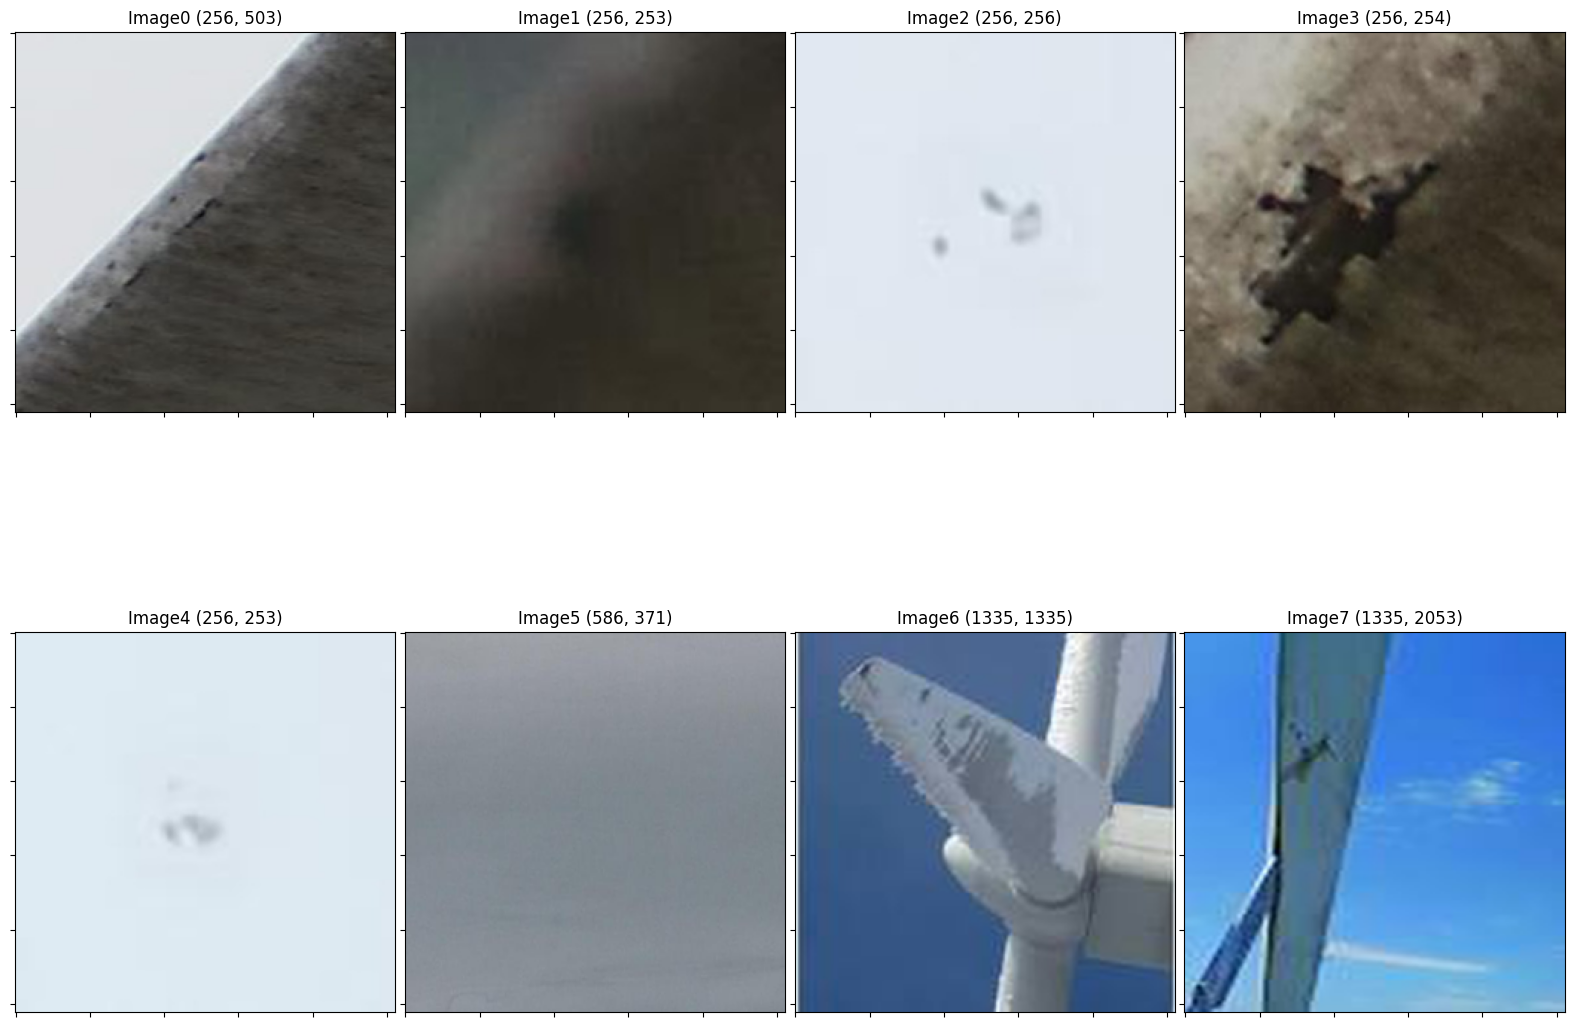

In [3]:
plot_image_grid(BlurImges)

## Remove Blur

In [4]:
import os
import cv2
import numpy as np

def remove_blur(input_dir, output_dir = 'deblurred', threshold=30, kernel_size=(5, 5), sharpening=True, allowed_extensions=None):
    """
    Remove blur from images in the input directory and save them in the output directory.

    Arguments:
    input_dir -- Input directory containing the images to be deblurred
    output_dir -- Output directory to save the deblurred images
    threshold -- Threshold for detecting blur (default: 30)
    kernel_size -- Kernel size for Gaussian blur (default: (5, 5))
    sharpening -- Apply sharpening after deblurring (default: True)
    allowed_extensions -- Set of allowed file extensions for deblurring (default: ['.jpg', '.jpeg', '.png'])
    """
    
    # Create the output directory if it does not exist
    os.makedirs(output_dir, exist_ok=True)
    
    # input_dir = get_image_paths(input_dir) #os.path.abspath(input_dir)#.replace("\\", "/")
    # output_dir = os.path.abspath(output_dir).replace("\\", "/")

    if allowed_extensions is None:
        allowed_extensions = set(['.jpg', '.jpeg', '.png'])

    images = get_image_paths(input_dir)
    deblurred_images = []
    
    for entry in images:
        image = cv2.imread(entry)
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        fm = cv2.Laplacian(gray, cv2.CV_64F).var()

        if fm < threshold:
            blurred = cv2.GaussianBlur(image, kernel_size, 0)
            deblurred = cv2.addWeighted(image, 1.5, blurred, -0.5, 0)

            if sharpening:
                kernel = np.array([[-1, -1, -1],
                                   [-1,  9, -1],
                                   [-1, -1, -1]])
                deblurred = cv2.filter2D(deblurred, -1, kernel)

            # Save deblurred image in the corresponding subdirectory of the output directory
            output_subdir = os.path.join(output_dir, os.path.dirname(entry))
            os.makedirs(output_subdir, exist_ok=True)
            output_file_path = os.path.join(output_subdir, os.path.basename(entry))

            cv2.imwrite(output_file_path, deblurred)
            deblurred_images.append(output_file_path)
        else:
            # If image is not blurred, copy it to the output directory with the same folder structure
            output_subdir = os.path.join(output_dir, os.path.dirname(entry)[len(input_dir):])
            os.makedirs(output_subdir, exist_ok=True)
            output_file_path = os.path.join(output_subdir, os.path.basename(entry))
            shutil.copy(entry.path, output_file_path)
            
    return deblurred_images

In [5]:
os.path.abspath('deblurred').replace("\\", "/")

'C:/Users/scrwh/Documents/PythonScripts/Master_Thesis/Function/RGBSAR/deblurred'

In [6]:
debluImages = remove_blur(BlurImges)

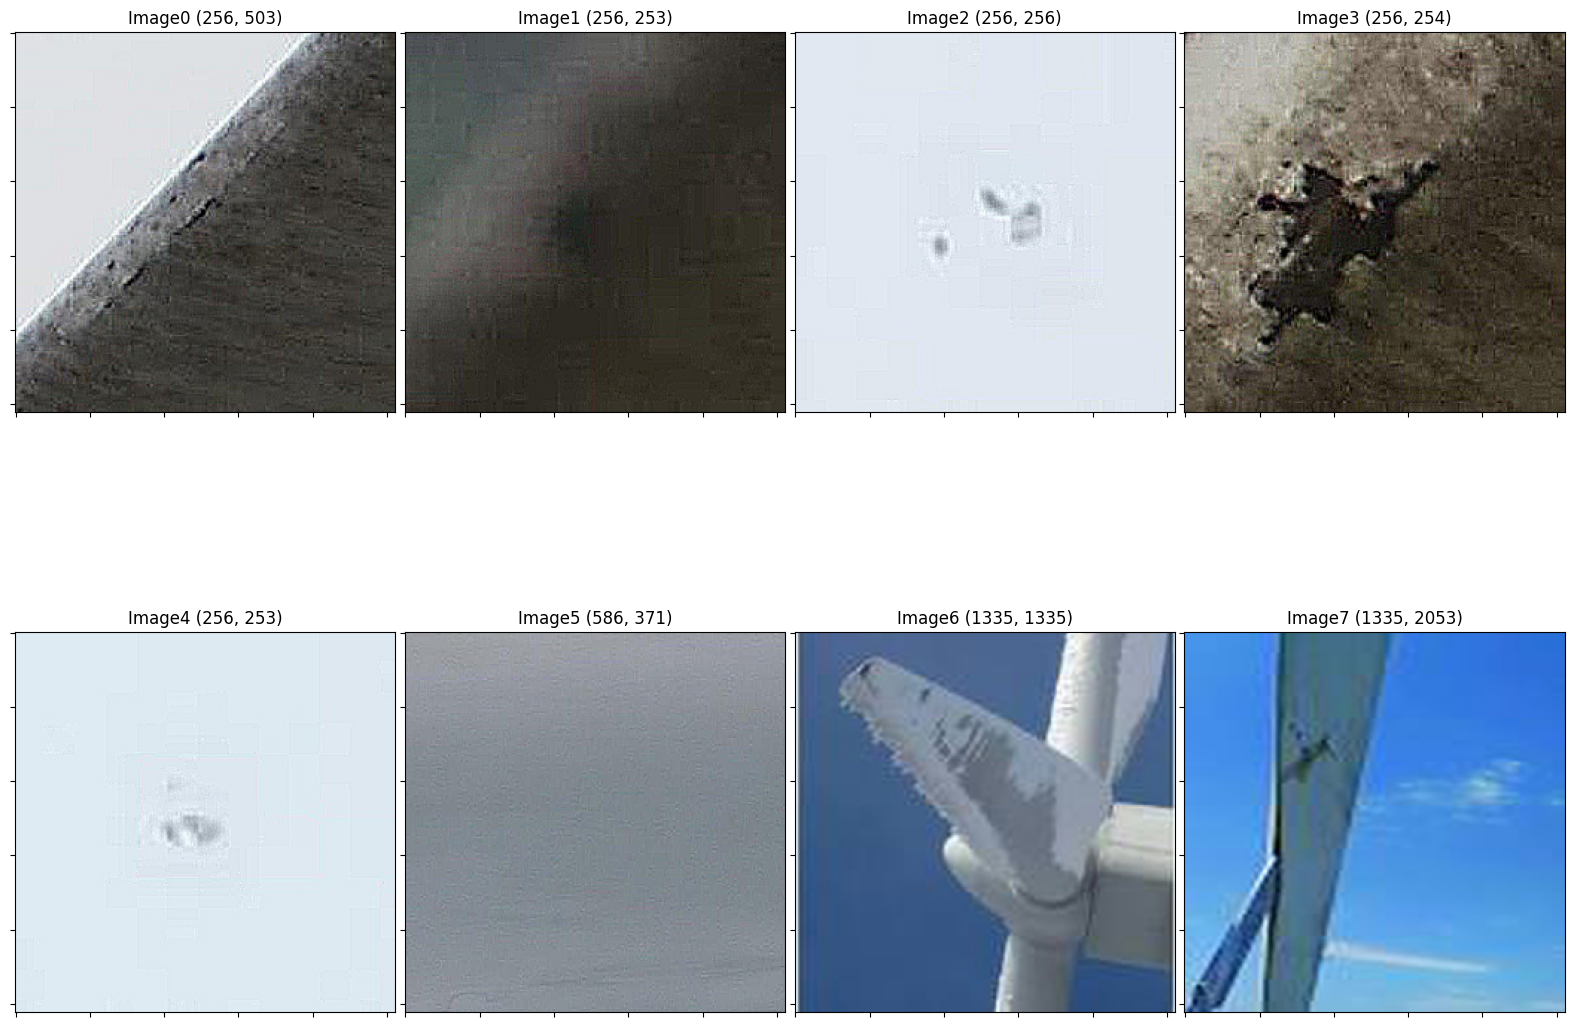

In [7]:
plot_image_grid(debluImages)